# Store Sales - Time Series Forecasting

### Contexto:
Los pronósticos no solo se limitan a la meteorología. Los gobiernos pronostican crecimiento económico. Los científicos intentan predecir la población futura. Y las empresas pronostican la demanda de productos, es una tarea común de los científicos de datos profesionales. Los pronósticos son especialmente relevantes para las tiendas de abarrotes tradicionales, que deben escoger delicadamente la cantidad de inventario que se debe comprar.
Para predecir un mayor precisión que productos deben comprar y en cuantas cantidades. Adivinar los artículos populares que se agotan rápidamente no es muy eficiente, esto puede generar una pérdida de ingresos y clientes molestos. Gracias al aprendizaje automático, se puede ayudar a garantizar a que los  clientes pueda tener suficientes productos correctos en el momento correcto.

Los métodos actuales de pronóstico subjetivo para el comercio minorista tienen pocos datos que los respalden y es poco probable que se automaticen. El problema se vuelve aún más complejo a medida que los minoristas agregan nuevas ubicaciones con necesidades únicas, nuevos productos, gustos estacionales en constante transición y marketing de productos impredecible.

### Meta:
Con lo anterior en mente debemos construir un modelo que prediga con mayor precisión las ventas unitarias de miles de artículos vendidos en diferentes tiendas Favorita.
Practicará sus habilidades de aprendizaje automático con un conjunto de datos de capacitación accesible de fechas, tiendas e información de artículos, promociones y ventas de unidades.

<br>

<div align="center"><img width="500" height="500" src='https://upload.wikimedia.org/wikipedia/commons/0/0f/Corporaci%C3%B3n_Favorita_Logo.png'></div>

<br>

### Equipo Cortesanas de IA:
- __Leonardo Alvarado__
- __Oscar Delgadillo__
- __David Guzmán__
- __Enrique Santos__



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
#Import other dependencies

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

#pandas dataframe configurations
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

### Obtenemos la ubicación de nuestros datos

In [3]:
DATA_PATH = '../input/store-sales-time-series-forecasting/'

In [4]:
for f in os.listdir(DATA_PATH):
    print(f)

oil.csv
sample_submission.csv
holidays_events.csv
stores.csv
train.csv
test.csv
transactions.csv


### Creamos diferentes DataFrames para cada una de las tablas que se nos presentan

In [5]:
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
df_test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))

df_stores = pd.read_csv(os.path.join(DATA_PATH, 'stores.csv'))
df_transactions = pd.read_csv(os.path.join(DATA_PATH, 'transactions.csv')).sort_values(['store_nbr', 'date'])
df_oil = pd.read_csv(os.path.join(DATA_PATH, 'oil.csv'))
df_holidays = pd.read_csv(os.path.join(DATA_PATH, 'holidays_events.csv'))

### Juntamos información que consideramos relevante para un train y un test más completos

In [6]:
train = pd.merge(df_train,df_stores, on='store_nbr',how='left')
test = pd.merge(df_test,df_stores, on='store_nbr',how='left')

train = pd.merge(train,df_oil, on='date',how='left')
test = pd.merge(test,df_oil, on='date',how='left')
    
holidays_events = df_holidays.set_index('date').sort_index()

train = pd.merge(train.set_index('date'), holidays_events,on='date',how='left')
train = train.rename(columns={"type_x":"type","type_y":"holidays_type"})

test = pd.merge(test.set_index('date'), holidays_events,on='date',how='left')
test = test.rename(columns={"type_x":"type","type_y":"holidays_type"})

No se hizo un merge con transaccions, ya que no hay información suficiente para emparejar dicha información con nuestro test.

In [7]:
train.head()

id  store_nbr      family  sales  onpromotion   city      state  \
date                                                                          
2013-01-01   0          1  AUTOMOTIVE 0.0000            0  Quito  Pichincha   
2013-01-01   1          1   BABY CARE 0.0000            0  Quito  Pichincha   
2013-01-01   2          1      BEAUTY 0.0000            0  Quito  Pichincha   
2013-01-01   3          1   BEVERAGES 0.0000            0  Quito  Pichincha   
2013-01-01   4          1       BOOKS 0.0000            0  Quito  Pichincha   

           type  cluster  dcoilwtico holidays_type    locale locale_name  \
date                                                                       
2013-01-01    D       13         NaN       Holiday  National     Ecuador   
2013-01-01    D       13         NaN       Holiday  National     Ecuador   
2013-01-01    D       13         NaN       Holiday  National     Ecuador   
2013-01-01    D       13         NaN       Holiday  National     Ecuador   
2013-01-01    D       13         NaN       Holiday  National     Ecuador   

                   description transferred  
date                                        
2013-01-01  Primer dia del ano       False  
2013-01-01  Primer dia del ano       False  
2013-01-01  Primer dia del ano       False  
2013-01-01  Primer dia del ano       False  
2013-01-01  Primer dia del ano       False

In [8]:
df_train.sales

0            0.0000
1            0.0000
2            0.0000
3            0.0000
4            0.0000
             ...   
3000883    438.1330
3000884    154.5530
3000885   2419.7290
3000886    121.0000
3000887     16.0000
Name: sales, Length: 3000888, dtype: float64

In [9]:
# Datetime
df_train["date"] = pd.to_datetime(df_train['date'])
df_test["date"] = pd.to_datetime(df_test.date)
df_transactions["date"] = pd.to_datetime(df_transactions.date)

In [10]:
# Data types
df_train.onpromotion = df_train.onpromotion.astype("float16")
df_train.sales = df_train.sales.astype("float32")
df_stores.cluster = df_stores.cluster.astype("int8")

df_train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE 0.0000       0.0000
1   1 2013-01-01          1   BABY CARE 0.0000       0.0000
2   2 2013-01-01          1      BEAUTY 0.0000       0.0000
3   3 2013-01-01          1   BEVERAGES 0.0000       0.0000
4   4 2013-01-01          1       BOOKS 0.0000       0.0000

In [11]:
df_train.describe()

id    store_nbr        sales  onpromotion
count 3000888.0000 3000888.0000 3000888.0000 3000888.0000
mean  1500443.5000      27.5000     357.7758          NaN
std    866281.8916      15.5858    1101.9977          NaN
min         0.0000       1.0000       0.0000       0.0000
25%    750221.7500      14.0000       0.0000       0.0000
50%   1500443.5000      27.5000      11.0000       0.0000
75%   2250665.2500      41.0000     195.8473       0.0000
max   3000887.0000      54.0000  124717.0000     741.0000

### EDA (Exploratory Data Analysis) Muy Básico

In [12]:
average_sales = df_train.groupby('date').mean()['sales']
average_sales.head()

date
2013-01-01     1.4094
2013-01-02   278.3908
2013-01-03   202.8402
2013-01-04   198.9111
2013-01-05   267.8732
Name: sales, dtype: float32

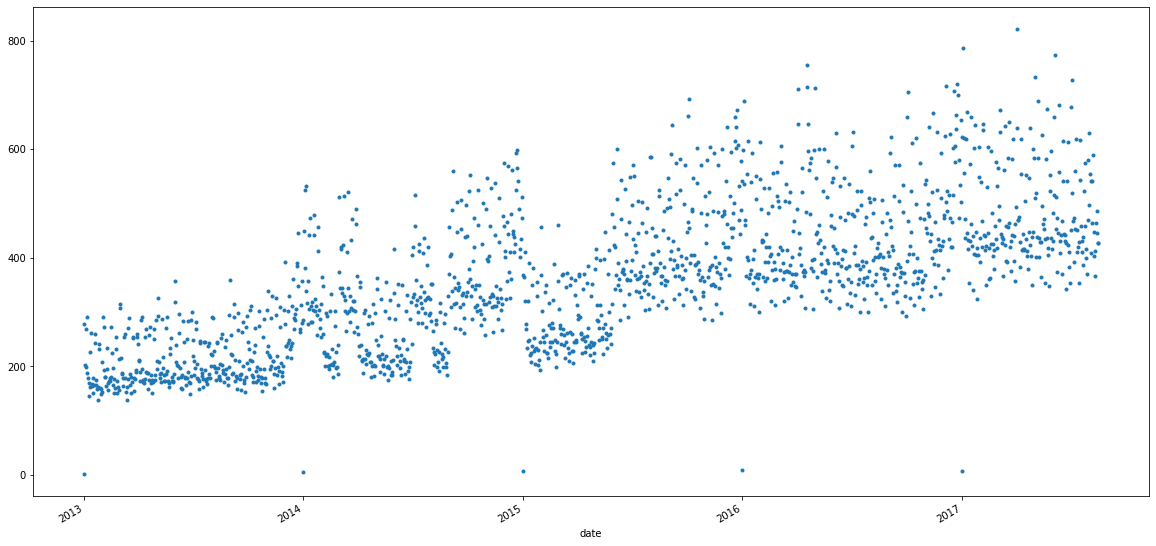

In [13]:
average_sales.plot(style='.', figsize=(20,10));

En el gráfico de dispersión de arriba podemos observar el promedio de ventas que hay por día durante desde 2013 hasta el 2018 aproximadamente.

In [14]:
avg_train = average_sales.copy()

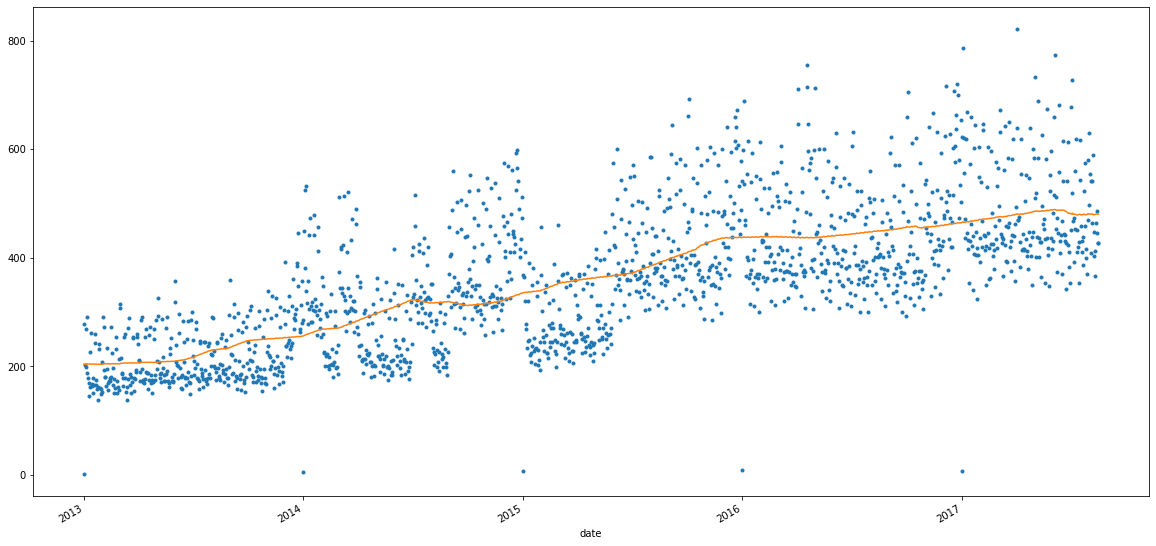

In [15]:
moving_avg = avg_train.rolling(window=365, center=True, min_periods=183).mean()
avg_train.plot(style='.', figsize=(20,10));
moving_avg.plot();

En el gráfico de arriba podemos observar como se va comportando los el promedio de ventas en el tiempo.

### EDA Básico con transactions

In [16]:
df_transactions.head()

date  store_nbr  transactions
1   2013-01-02          1          2111
47  2013-01-03          1          1833
93  2013-01-04          1          1863
139 2013-01-05          1          1509
185 2013-01-06          1           520

In [17]:
average_transactions = df_transactions.groupby('date').mean()['transactions']
average_transactions.head()

date
2013-01-01    770.0000
2013-01-02   2026.4130
2013-01-03   1706.6087
2013-01-04   1706.3913
2013-01-05   2034.1957
Name: transactions, dtype: float64

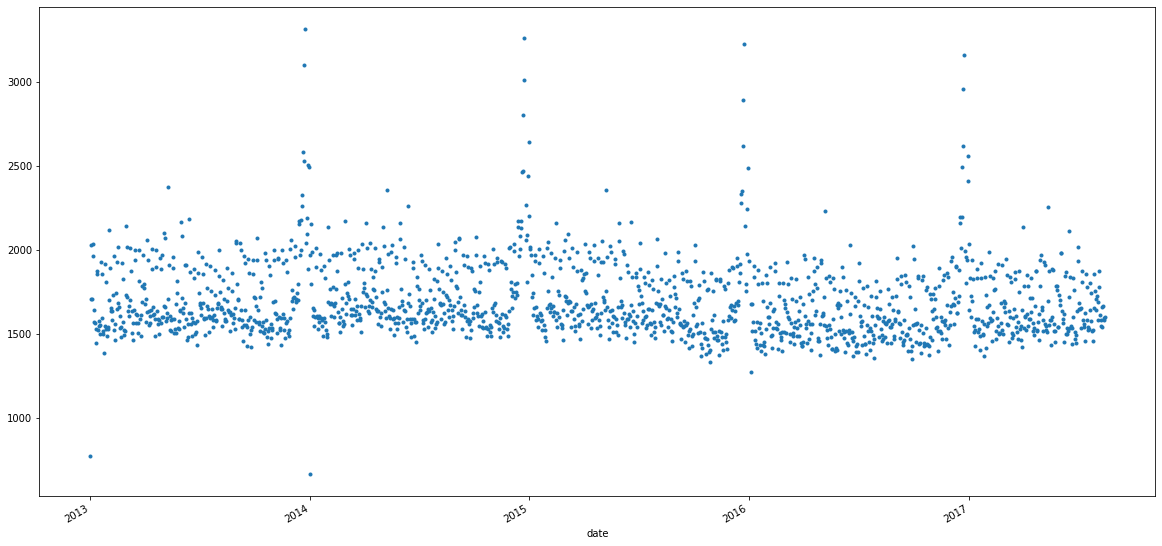

In [18]:
average_transactions.plot(style='.', figsize=(20,10));

En este gráfico de dispersión podemos ver el comportamiento del promedio de transacciones diarias durante el tiempo.

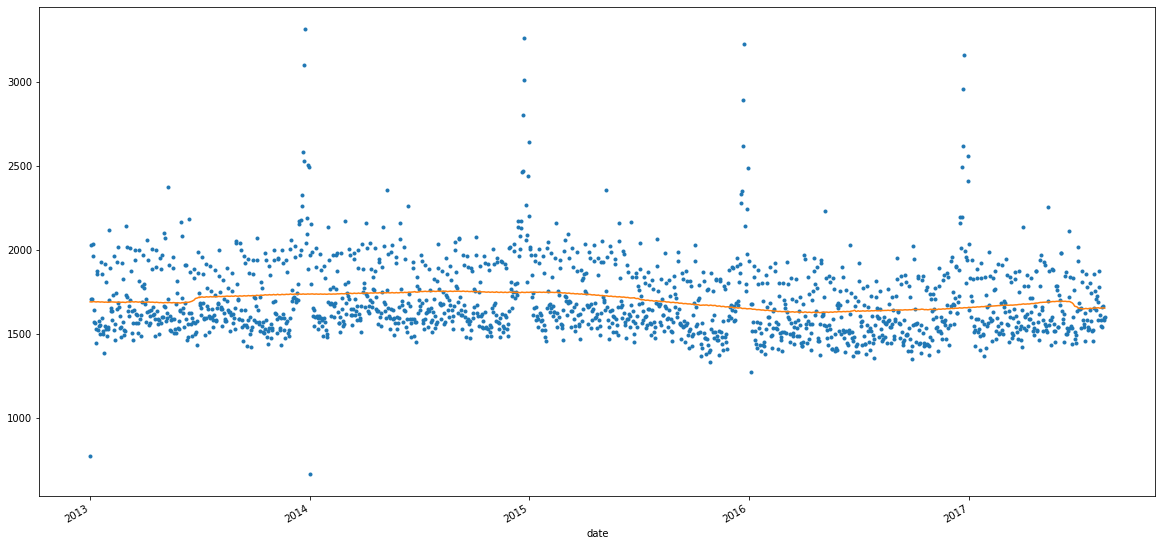

In [19]:
avg_transactions = average_transactions.copy()

moving_avg = avg_transactions.rolling(window=365, center=True, min_periods=183).mean()
avg_transactions.plot(style='.', figsize=(20,10));
moving_avg.plot();

Por otra parte en este gráfico se añade el promedio de transacciones anuales en el tiempo.

### Se realizó el análisis y limpieza de datos de las familias de productos vendidas en las tiendas Favorita, localizadas en Ecuador

Para este análisis primero observamos que tiendas han vendido mayor cantidad de productos.

In [20]:
df_train_temp = df_train.groupby(['date', 'store_nbr']).sales.sum().reset_index()
df_train_temp

date  store_nbr      sales
0     2013-01-01          1     0.0000
1     2013-01-01          2     0.0000
2     2013-01-01          3     0.0000
3     2013-01-01          4     0.0000
4     2013-01-01          5     0.0000
...          ...        ...        ...
90931 2017-08-15         50 16879.1211
90932 2017-08-15         51 20154.5586
90933 2017-08-15         52 18600.0469
90934 2017-08-15         53  8208.1895
90935 2017-08-15         54 12666.8584

[90936 rows x 3 columns]

Generamos una tabla auxiliar que junta diferentes valores para observar las ventas y transacción que hay en las diferentes tiendas con respecto al tiempo.

In [21]:
df_aux_merged = pd.merge(df_train_temp, df_transactions, how='left')
df_aux_merged.columns

Index(['date', 'store_nbr', 'sales', 'transactions'], dtype='object')

Obtenemos la correlación que tienen las ventas con las transacciones.

In [22]:
pearson_corr = df_aux_merged.corr('pearson')['sales'].loc['transactions']
spearman_corr = df_aux_merged.corr('spearman')['sales'].loc['transactions']
print(f'pearson corr = {pearson_corr:.4f} and spearman corr = {spearman_corr:.4f}')

pearson corr = 0.8374 and spearman corr = 0.8175


In [23]:
df_sorted_trans = df_transactions.sort_values(['store_nbr', 'date'])

px.line(df_sorted_trans, x='date', y='transactions', color='store_nbr', title='Transactions by date and store')

En el gráfico de arriba el número de transacciones que se realiza por tienda, dandonos cuenta que la número 44 es la que tiene el mayor número de transacciones y que en general tiene un pico durante festividades navideñas (a finales de todos lo años).

In [24]:
aux_a = df_transactions.copy()
aux_a['year'] = aux_a.date.dt.year
aux_a['month'] = aux_a['date'].dt.month

aux_a.head()

date  store_nbr  transactions  year  month
1   2013-01-02          1          2111  2013      1
47  2013-01-03          1          1833  2013      1
93  2013-01-04          1          1863  2013      1
139 2013-01-05          1          1509  2013      1
185 2013-01-06          1           520  2013      1

In [25]:
px.box(aux_a, x='year', y='transactions', color='month', title='Box plot transactions')

En el gráfico de cajas de arriba nos podemos dar cuenta que el mayor número de transacciones se da en diciembre (por las festividades), mientras que los otros meses los valores no tienden a variar mucho.

In [26]:
aux_a = df_transactions.set_index('date').resample('M').transactions.mean().reset_index()
aux_a['year'] = aux_a.date.dt.year

px.line(aux_a, x='date', y='transactions', color='year', title='Monthly transactions')

En esta gráfica de arriba tambien podemos ver las transacciones por año teniendo mayor cantidad de transacciones en el 2014 y una mayor pendiente negativa en 2015 derivando en un minimo número de transacciones durante el año 2016.

### EDA Básico con stores

In [27]:
fam_sales = df_train.groupby(['family']).sales.sum()
fam_sales.head()

family
AUTOMOTIVE      554822.0000
BABY CARE        10051.0000
BEAUTY          337893.0000
BEVERAGES    216954480.0000
BOOKS             6438.0000
Name: sales, dtype: float32

In [28]:
px.line(fam_sales)

En esta gráfica desplegamos las ventas totales por tipo de producto en toda la corporación.

In [29]:
df_train_temp = df_train.groupby(['date', 'store_nbr']).sales.sum().reset_index()
df_train_temp

date  store_nbr      sales
0     2013-01-01          1     0.0000
1     2013-01-01          2     0.0000
2     2013-01-01          3     0.0000
3     2013-01-01          4     0.0000
4     2013-01-01          5     0.0000
...          ...        ...        ...
90931 2017-08-15         50 16879.1211
90932 2017-08-15         51 20154.5586
90933 2017-08-15         52 18600.0469
90934 2017-08-15         53  8208.1895
90935 2017-08-15         54 12666.8584

[90936 rows x 3 columns]

In [30]:
df_train_temp2 = df_train.groupby(['date', 'family']).sales.sum().reset_index()
df_train_temp2

date                      family       sales
0     2013-01-01                  AUTOMOTIVE      0.0000
1     2013-01-01                   BABY CARE      0.0000
2     2013-01-01                      BEAUTY      2.0000
3     2013-01-01                   BEVERAGES    810.0000
4     2013-01-01                       BOOKS      0.0000
...          ...                         ...         ...
55567 2017-08-15                     POULTRY  17586.7109
55568 2017-08-15              PREPARED FOODS   4641.5229
55569 2017-08-15                     PRODUCE 125108.9688
55570 2017-08-15  SCHOOL AND OFFICE SUPPLIES   2530.0000
55571 2017-08-15                     SEAFOOD    970.1770

[55572 rows x 3 columns]

In [31]:
px.line(df_train_temp2, x = 'date', y = 'sales', color = 'family')

Con un mayor análisis nos pudimos dar cuenta con el gráfico de arriba que la mayor familia que se vende en la tienda son del tipo GROCERY I (árticulos de primera necesidad), además al investigar un poco sobre el máximo que tenemos, nos pudimos dar cuenta que es debido a un terremoto el 16 de abril de 2016, que podría ser una buena decisión quitar esos datos para que no afecte nuestro modelo de predicción, ya que no podemos saber cuando va a ocurrir un terremoto.

In [32]:
#df_stores.head()
df_stores_group = df_stores.copy()
df_stores_group = df_stores_group.groupby(['city']).count().reset_index()
#df_stores_group.head()
px.bar(df_stores_group, x='city', y='type', title='Stores by city')

En el histograma de arriba mostramos la cantidad de tiendas que hay por ciudad.

In [33]:
df_stores_state = df_stores_group.groupby(['state']).count().reset_index()
#df_stores_group.head()
px.bar(df_stores_state, x='state', y='type', title='Stores by state')

En el histograma de arriba mostramos la cantidad de tiendas que hay por estado.

In [34]:
train.isnull().sum()

id                     0
store_nbr              0
family                 0
sales                  0
onpromotion            0
city                   0
state                  0
type                   0
cluster                0
dcoilwtico        955152
holidays_type    2551824
locale           2551824
locale_name      2551824
description      2551824
transferred      2551824
dtype: int64

<AxesSubplot:xlabel='date'>

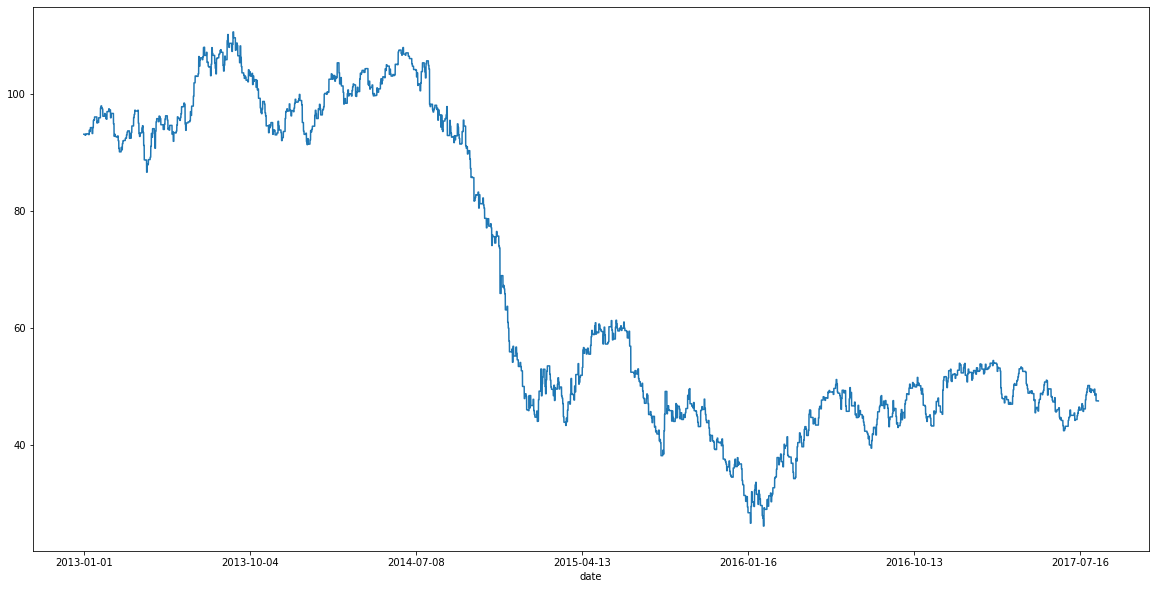

In [35]:
train["dcoilwtico"] = train["dcoilwtico"].fillna(method='bfill',axis=0)
train["dcoilwtico"].plot(figsize=(20, 10))

En el gráfico de arriba se aprecia una gran decaída del petróleo por el tiempo, que teóricamente afectaría la salud económica, y como pudimos ver en tablas de trasacciones la caida del precio del petroleo en 2015-2016 también afecto el número de transacción que se dio esos años.

In [36]:
df_train_temp2 = df_train.groupby(['date','store_nbr']).sales.sum().reset_index()
df_train_temp2

df_train_stores = pd.merge(df_train_temp2, df_stores, how = 'left')

df_train_stores.columns

px.line(df_train_stores, x = 'date', y = 'sales', color = 'state', title = 'Sales by state')

Con la información de los histogramas de arriba graficamos las ventas por estado, donde podemos ver que el estado que tiene una mayor cantidad de ventas es en Pichincha, esto puede darse porque se encuentra la capital kito y porque tiene la mayor cantidad de tiendas.

### ETL Process

In [37]:
train.isna().sum()
train.count()

# train['holidays_type'].value_counts()
# train.transferred.value_counts()
# train.locale_name.value_counts()
# train.city.value_counts()

id               3054348
store_nbr        3054348
family           3054348
sales            3054348
onpromotion      3054348
city             3054348
state            3054348
type             3054348
cluster          3054348
dcoilwtico       3054348
holidays_type     502524
locale            502524
locale_name       502524
description       502524
transferred       502524
dtype: int64

In [38]:
test.isna().sum()
test.count()

id               28512
store_nbr        28512
family           28512
onpromotion      28512
city             28512
state            28512
type             28512
cluster          28512
dcoilwtico       21384
holidays_type     1782
locale            1782
locale_name       1782
description       1782
transferred       1782
dtype: int64

Analizamos los contenidos de celdas con valores nulos muy altos y tras analizar su contenido, decidimos que la mejor opción era eliminarlas, ya que de algunas la información no era relevante y de otras podiamos encontrar esa información como fue en el caso de _locale_ y _locale_name_ con _city_ y _state_.

In [39]:
# Drop not usefull rows
train = train.drop(['locale', 'locale_name', 'description', 'transferred'], axis=1)
test = test.drop(['locale', 'locale_name', 'description', 'transferred'], axis=1)

In [40]:
train

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE    0.0000   
2013-01-01        1          1                   BABY CARE    0.0000   
2013-01-01        2          1                      BEAUTY    0.0000   
2013-01-01        3          1                   BEVERAGES    0.0000   
2013-01-01        4          1                       BOOKS    0.0000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY  438.1330   
2017-08-15  3000884          9              PREPARED FOODS  154.5530   
2017-08-15  3000885          9                     PRODUCE 2419.7290   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES  121.0000   
2017-08-15  3000887          9                     SEAFOOD   16.0000   

            onpromotion   city      state type  cluster  dcoilwtico  \
date                                                                  
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
...                 ...    ...        ...  ...      ...         ...   
2017-08-15            0  Quito  Pichincha    B        6     47.5700   
2017-08-15            1  Quito  Pichincha    B        6     47.5700   
2017-08-15          148  Quito  Pichincha    B        6     47.5700   
2017-08-15            8  Quito  Pichincha    B        6     47.5700   
2017-08-15            0  Quito  Pichincha    B        6     47.5700   

           holidays_type  
date                      
2013-01-01       Holiday  
2013-01-01       Holiday  
2013-01-01       Holiday  
2013-01-01       Holiday  
2013-01-01       Holiday  
...                  ...  
2017-08-15       Holiday  
2017-08-15       Holiday  
2017-08-15       Holiday  
2017-08-15       Holiday  
2017-08-15       Holiday  

[3054348 rows x 11 columns]

Modificamos la columna de holidays_type para separarlos en solo dos casos 1: holiday o 0: no holiday.

In [41]:
train.holidays_type =  train.holidays_type.fillna(0)
train.holidays_type.value_counts()

0             2551824
Holiday        304722
Event           99792
Additional      67716
Transfer        16038
Work Day         8910
Bridge           5346
Name: holidays_type, dtype: int64

In [42]:
train.holidays_type = train.holidays_type.replace(['Holiday', 'Event', 'Additional',
                                                   'Transfer', 'Work Day', 'Bridge'], 1)
train.holidays_type.value_counts()

0    2551824
1     502524
Name: holidays_type, dtype: int64

In [43]:
train

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE    0.0000   
2013-01-01        1          1                   BABY CARE    0.0000   
2013-01-01        2          1                      BEAUTY    0.0000   
2013-01-01        3          1                   BEVERAGES    0.0000   
2013-01-01        4          1                       BOOKS    0.0000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY  438.1330   
2017-08-15  3000884          9              PREPARED FOODS  154.5530   
2017-08-15  3000885          9                     PRODUCE 2419.7290   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES  121.0000   
2017-08-15  3000887          9                     SEAFOOD   16.0000   

            onpromotion   city      state type  cluster  dcoilwtico  \
date                                                                  
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
2013-01-01            0  Quito  Pichincha    D       13     93.1400   
...                 ...    ...        ...  ...      ...         ...   
2017-08-15            0  Quito  Pichincha    B        6     47.5700   
2017-08-15            1  Quito  Pichincha    B        6     47.5700   
2017-08-15          148  Quito  Pichincha    B        6     47.5700   
2017-08-15            8  Quito  Pichincha    B        6     47.5700   
2017-08-15            0  Quito  Pichincha    B        6     47.5700   

            holidays_type  
date                       
2013-01-01              1  
2013-01-01              1  
2013-01-01              1  
2013-01-01              1  
2013-01-01              1  
...                   ...  
2017-08-15              1  
2017-08-15              1  
2017-08-15              1  
2017-08-15              1  
2017-08-15              1  

[3054348 rows x 11 columns]

### Linear Regression Model